In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV
import joblib
import os

In [2]:
df = pd.read_csv("out.csv")
df['label'] = df['label'].map({'legitimate': True, 'phishing': False})
df = df.drop(columns=["source", "url", "whois_data"])
df = df.sample(frac=0.1)
df.head()

,label,url_length,starts_with_ip,url_entropy,has_punycode,digit_letter_ratio,dot_count,at_count,dash_count,tld_count,domain_has_digits,subdomain_count,nan_char_entropy,has_internal_links,domain_age_days
188358,True,26,False,3.738149,False,0.000000,3,0,0,0,False,1,0.359478,False,5321.0
2412338,False,84,False,4.614052,False,0.111111,5,0,0,0,False,2,0.788966,False,NaN
585819,True,11,False,2.845351,False,0.000000,1,0,0,0,False,0,0.314494,False,NaN
18869,True,8,False,3.000000,False,0.750000,1,0,0,0,True,0,0.375000,False,353.0
586542,True,10,False,2.921928,False,0.000000,1,0,0,0,False,0,0.332193,False,5203.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 250000 entries, 188358 to 1007462
Data columns (total 15 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   label               250000 non-null  bool   
 1   url_length          250000 non-null  int64  
 2   starts_with_ip      250000 non-null  bool   
 3   url_entropy         250000 non-null  float64
 4   has_punycode        250000 non-null  bool   
 5   digit_letter_ratio  250000 non-null  float64
 6   dot_count           250000 non-null  int64  
 7   at_count            250000 non-null  int64  
 8   dash_count          250000 non-null  int64  
 9   tld_count           250000 non-null  int64  
 10  domain_has_digits   250000 non-null  bool   
 11  subdomain_count     250000 non-null  int64  
 12  nan_char_entropy    250000 non-null  float64
 13  has_internal_links  250000 non-null  bool   
 14  domain_age_days     174773 non-null  float64
dtypes: bool(5), float64(4), int64(6)


In [4]:
df.describe()

,url_length,url_entropy,digit_letter_ratio,dot_count,at_count,dash_count,tld_count,subdomain_count,nan_char_entropy,domain_age_days
count,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,174773.000000
mean,45.690688,3.906862,0.116199,2.176456,0.011064,0.736596,0.039616,0.779492,0.465639,4862.193754
std,84.248240,0.636063,0.242307,1.729394,0.139706,1.646905,0.388689,1.110053,0.188147,3345.550023
min,4.000000,0.684038,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.028273,0.000000
25%,17.000000,3.447402,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.306397,2013.000000
50%,29.000000,3.909368,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000,0.415452,4281.000000
75%,52.000000,4.329240,0.132887,3.000000,0.000000,1.000000,0.000000,1.000000,0.618469,7729.000000
max,25515.000000,6.032115,10.428571,124.000000,27.000000,303.000000,65.000000,39.000000,1.599741,14382.000000


In [5]:
df.isnull().sum()

label                     0
url_length                0
starts_with_ip            0
url_entropy               0
has_punycode              0
digit_letter_ratio        0
dot_count                 0
at_count                  0
dash_count                0
tld_count                 0
domain_has_digits         0
subdomain_count           0
nan_char_entropy          0
has_internal_links        0
domain_age_days       75227
dtype: int64

In [6]:
df = df.dropna()
print(df.isnull().sum())

label                 0
url_length            0
starts_with_ip        0
url_entropy           0
has_punycode          0
digit_letter_ratio    0
dot_count             0
at_count              0
dash_count            0
tld_count             0
domain_has_digits     0
subdomain_count       0
nan_char_entropy      0
has_internal_links    0
domain_age_days       0
dtype: int64


In [7]:
categorical_cols = df.select_dtypes(include=['object', 'category']).columns
df = df.drop(columns=categorical_cols)
correlation_matrix = df.corr()

In [8]:
df

,label,url_length,starts_with_ip,url_entropy,has_punycode,digit_letter_ratio,dot_count,at_count,dash_count,tld_count,domain_has_digits,subdomain_count,nan_char_entropy,has_internal_links,domain_age_days
188358,True,26,False,3.738149,False,0.000000,3,0,0,0,False,1,0.359478,False,5321.0
18869,True,8,False,3.000000,False,0.750000,1,0,0,0,True,0,0.375000,False,353.0
586542,True,10,False,2.921928,False,0.000000,1,0,0,0,False,0,0.332193,False,5203.0
1195980,True,26,False,3.844107,False,0.000000,3,0,1,0,False,2,0.359478,False,9412.0
543081,True,15,False,3.506891,False,0.000000,2,0,0,0,False,1,0.387585,False,3888.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2108406,False,55,False,4.606284,False,0.073171,3,0,2,0,False,0,0.648504,False,1352.0
488379,True,21,False,3.160208,False,0.058824,3,0,0,0,False,2,0.401051,False,9855.0
1310742,False,54,False,4.371494,False,0.243243,2,0,3,0,False,1,0.458786,False,4346.0
2427408,False,49,False,4.198708,False,0.000000,3,0,2,0,False,1,0.608024,False,4167.0


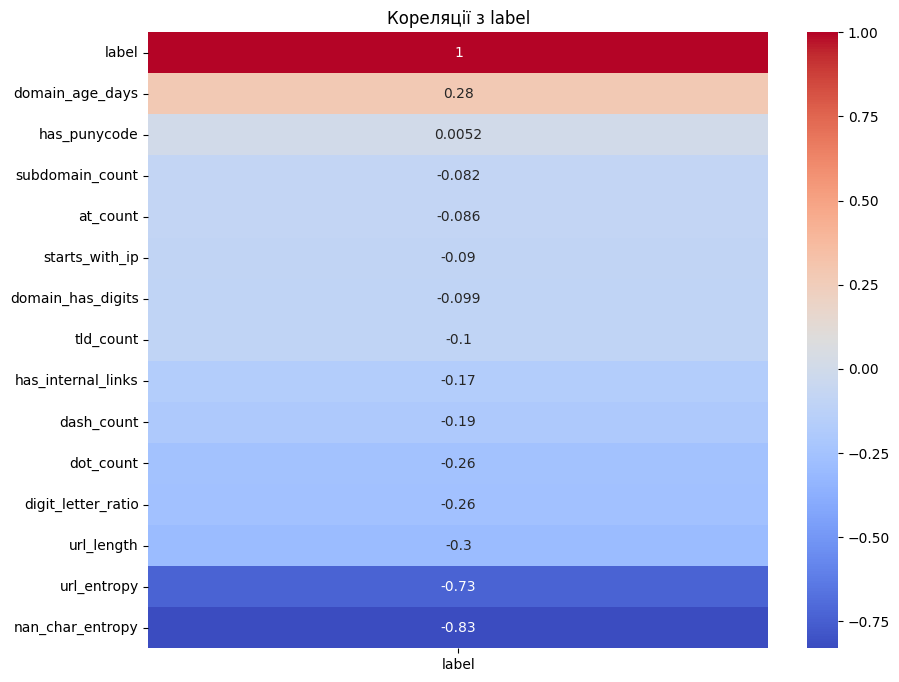

In [9]:
target_feature = 'label'
correlations_with_target = correlation_matrix[[target_feature]].sort_values(by=target_feature, ascending=False)
plt.figure(figsize=(10, 8))
sns.heatmap(correlations_with_target, annot=True, cmap='coolwarm')
plt.title(f'Кореляції з {target_feature}')
plt.show()

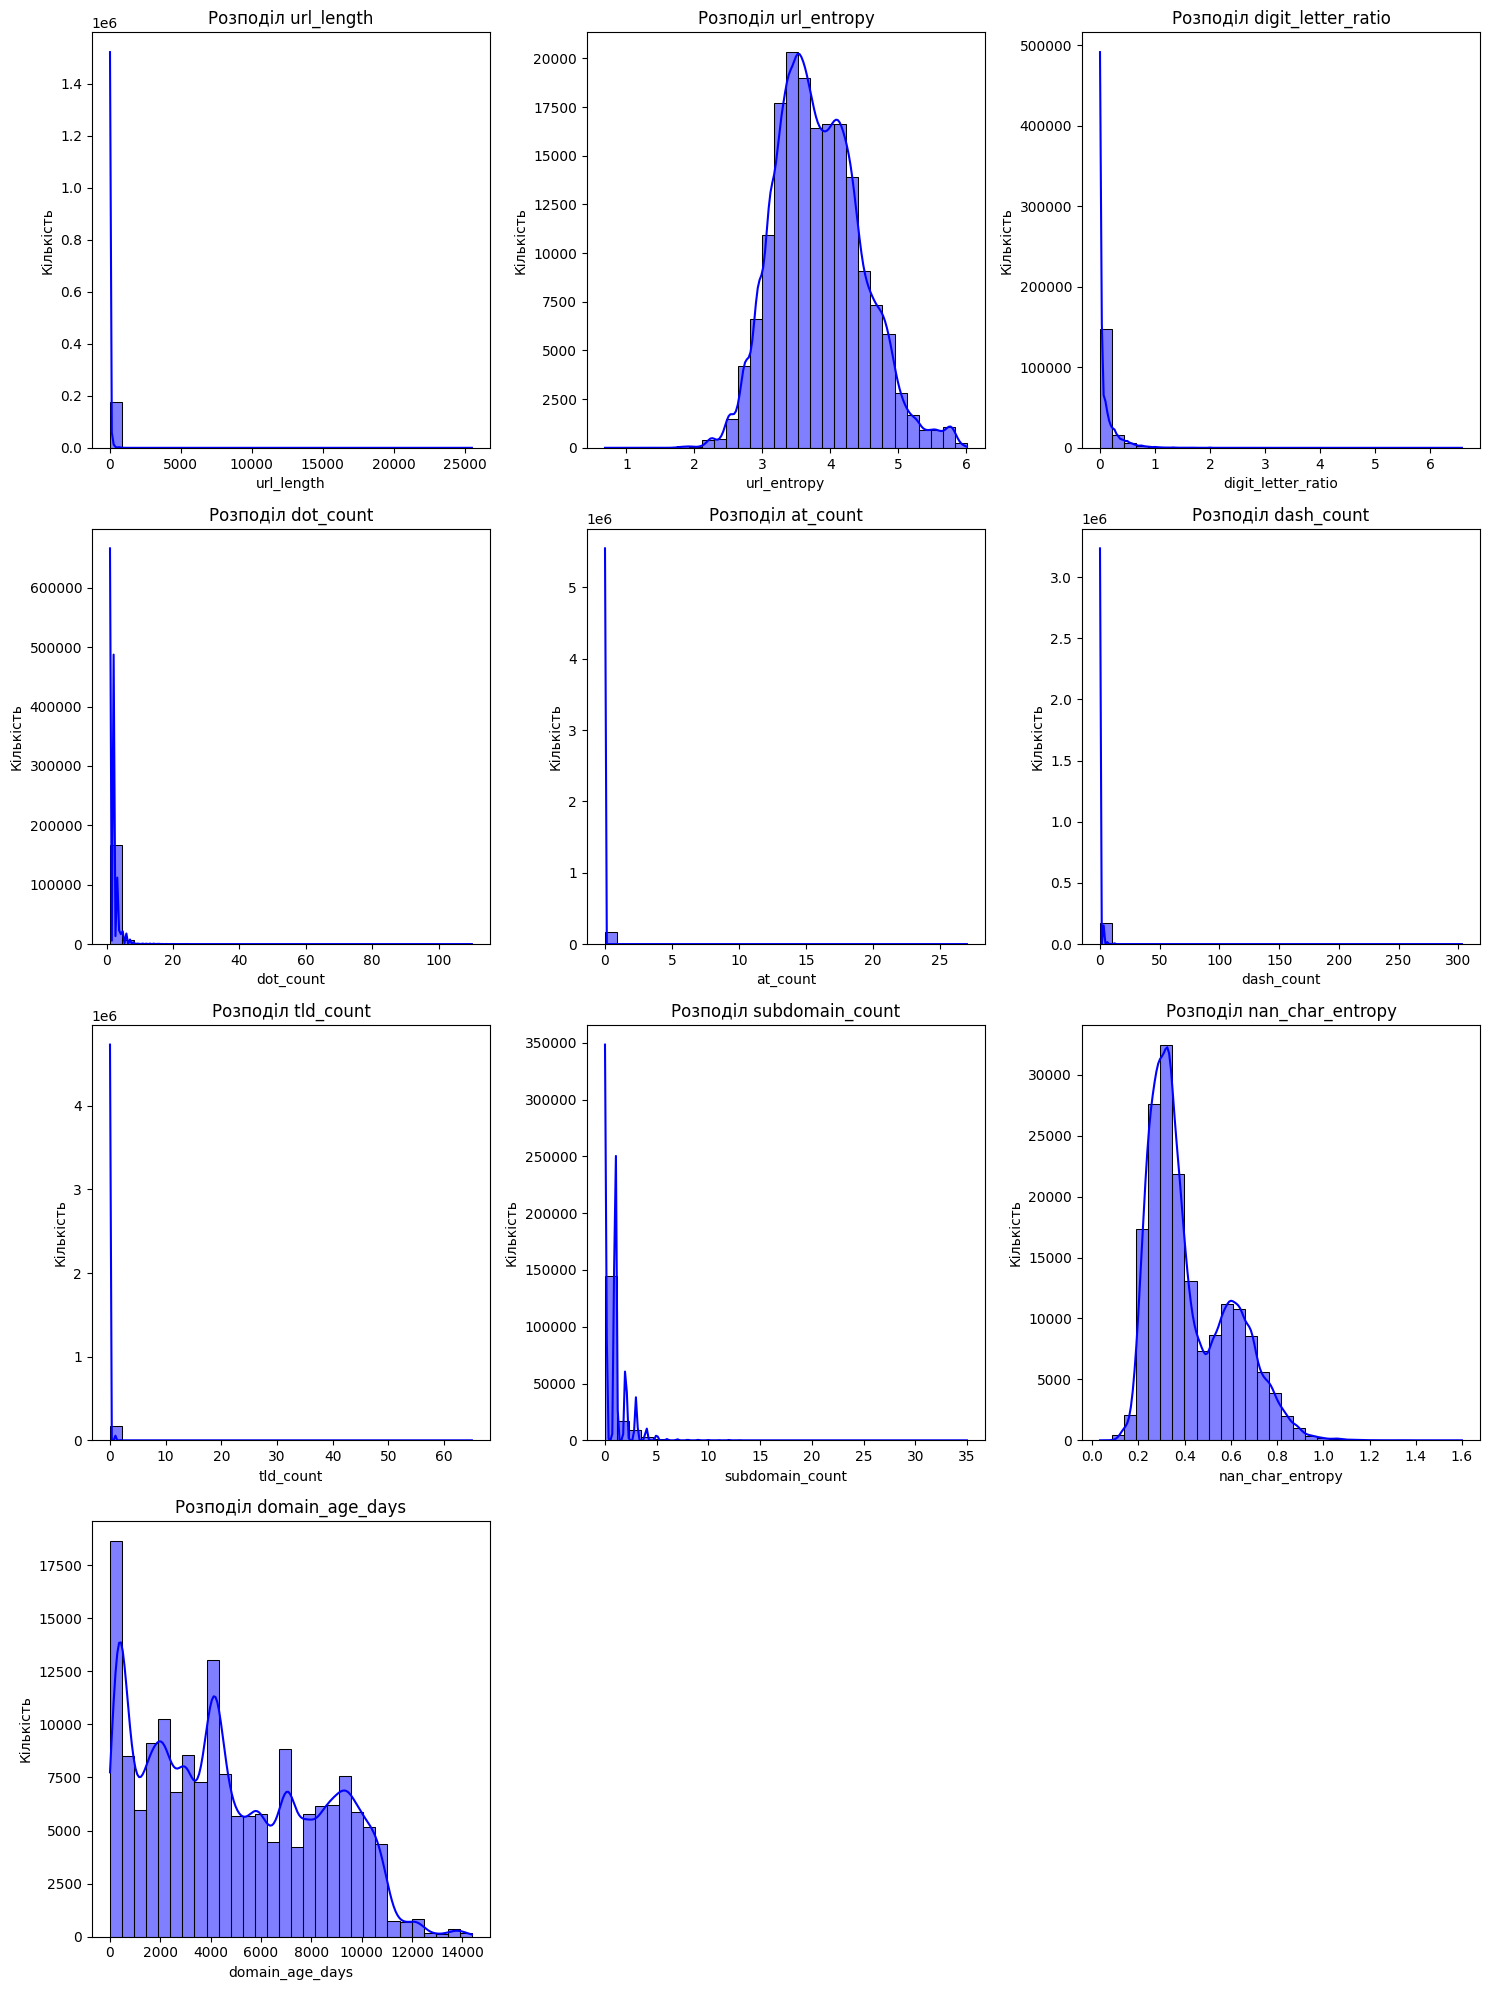

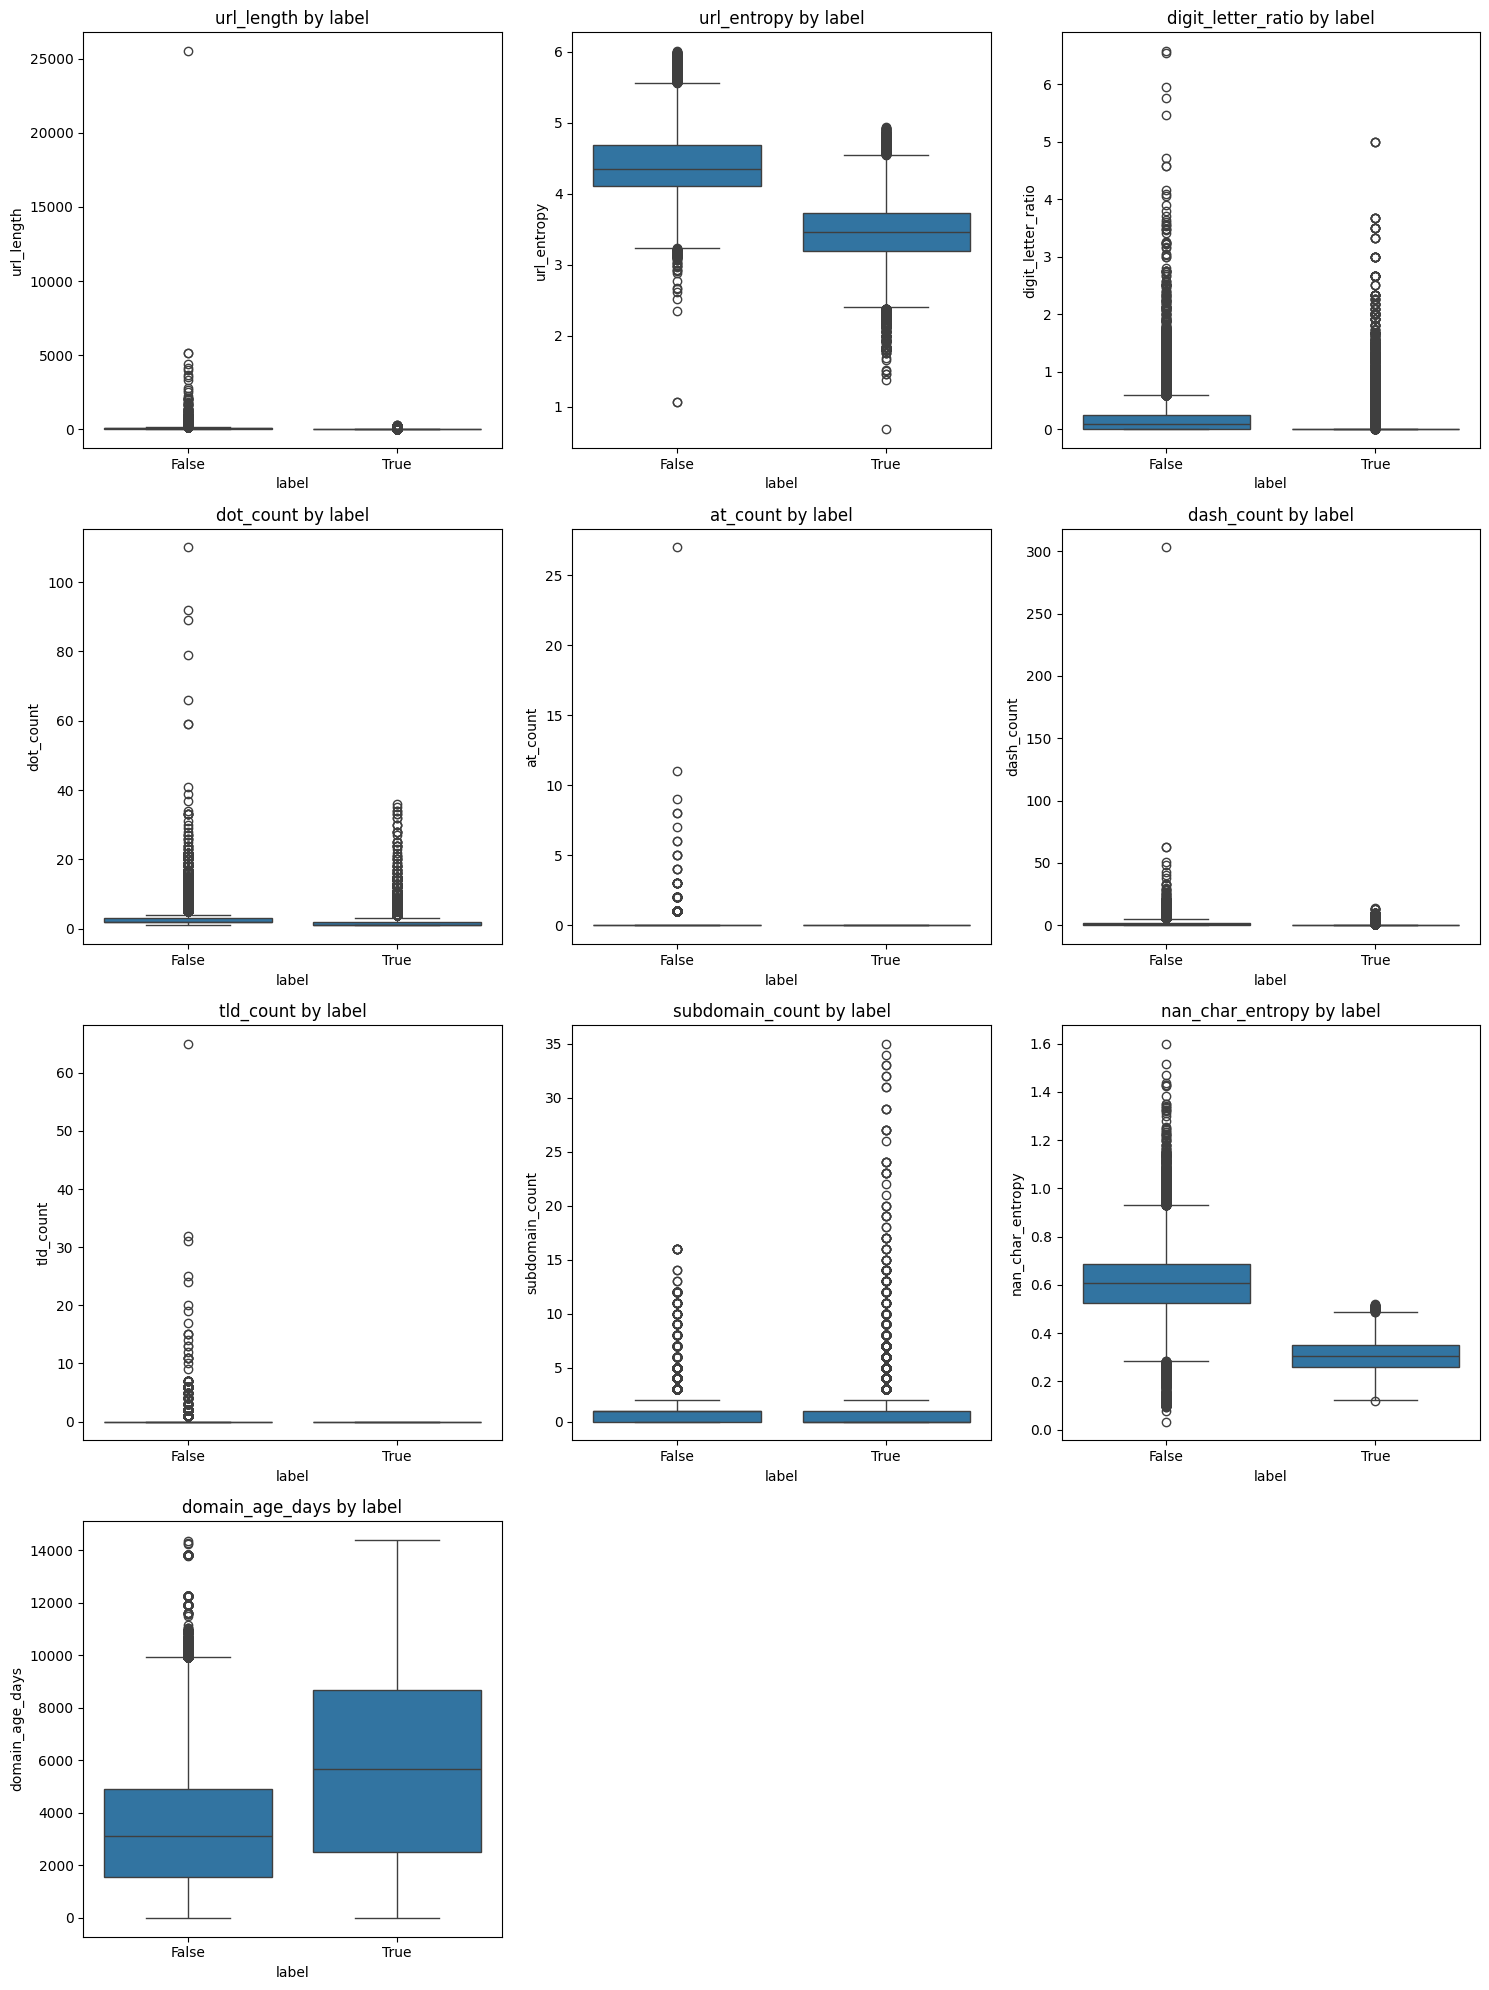

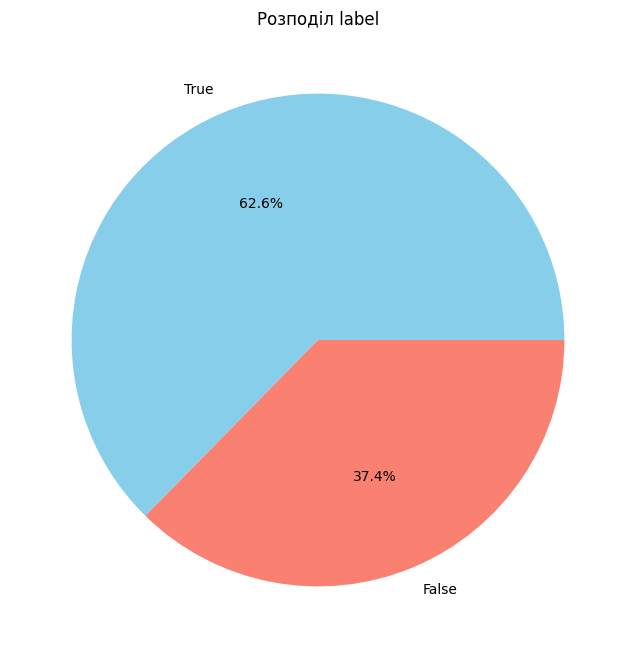

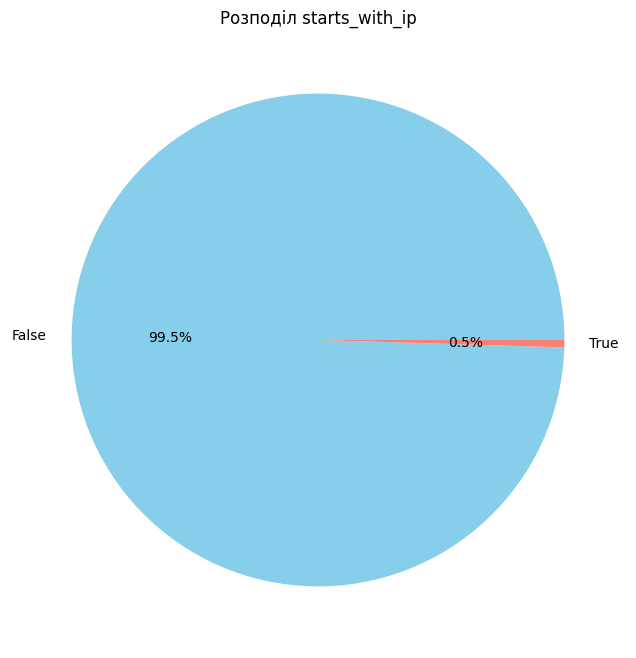

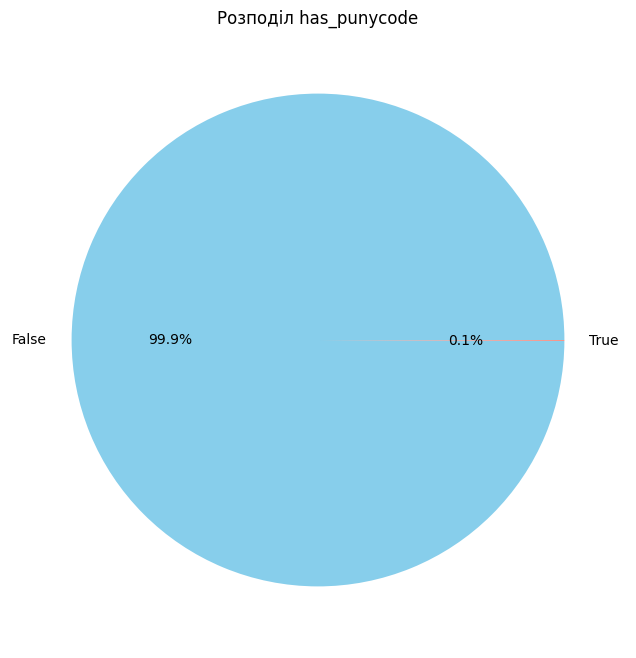

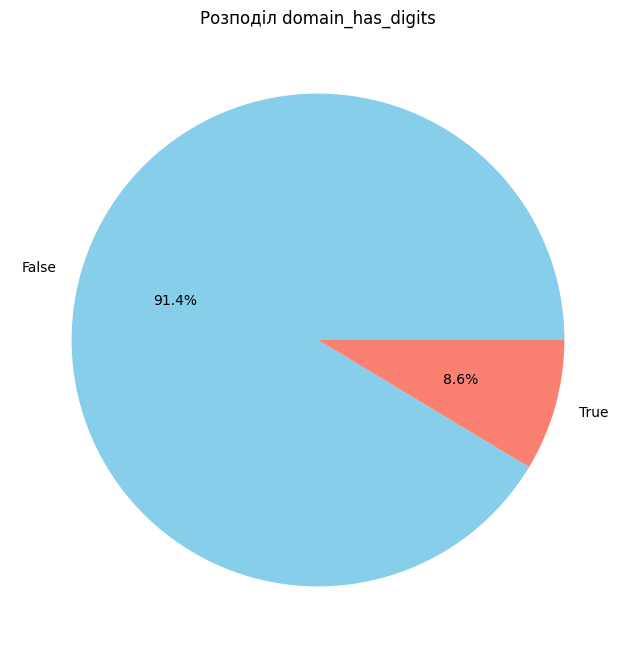

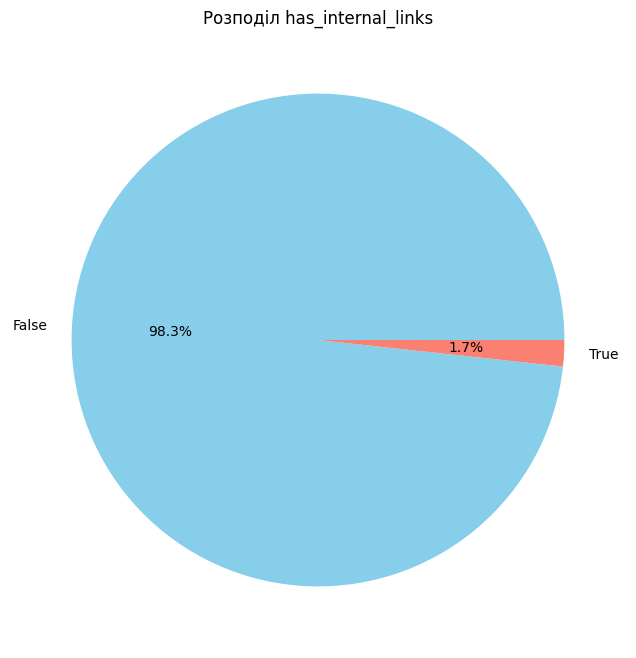

In [10]:
boolean_features = df.select_dtypes(include=['bool']).columns
numerical_features = df.select_dtypes(include=['number']).columns

def plot_histograms(features):
    num_features = len(features)
    num_cols = 3  
    num_rows = int(np.ceil(num_features / num_cols)) 
    plt.figure(figsize=(15, 5 * num_rows))
    
    for i, feature in enumerate(features):
        plt.subplot(num_rows, num_cols, i+1)
        sns.histplot(df[feature], kde=True, bins=30, color='blue')
        plt.title(f'Розподіл {feature}')
        plt.xlabel(feature)
        plt.ylabel('Кількість')
    
    plt.tight_layout()
    plt.show()

def plot_boxplots(features):
    num_features = len(features)
    num_cols = 3 
    num_rows = int(np.ceil(num_features / num_cols))
    plt.figure(figsize=(15, 5 * num_rows))
    
    for i, feature in enumerate(features):
        plt.subplot(num_rows, num_cols, i+1)
        sns.boxplot(x=target_feature, y=feature, data=df)
        plt.title(f'{feature} by {target_feature}')
        plt.xlabel(f'{target_feature}')
        plt.ylabel(feature)
    
    plt.tight_layout()
    plt.show()

def plot_pie_charts(features):
    for feature in features:
        plt.figure(figsize=(8, 8))
        counts = df[feature].value_counts()
        plt.pie(counts, labels=counts.index, autopct='%1.1f%%', colors=['skyblue', 'salmon'])
        plt.title(f'Розподіл {feature}')
        plt.show()

if len(numerical_features) > 0:
    plot_histograms(numerical_features)

if len(numerical_features) > 0:
    plot_boxplots(numerical_features)

if len(boolean_features) > 0:
    plot_pie_charts(boolean_features)

In [11]:
features = df.drop(columns=[target_feature])

In [12]:
scaler = MinMaxScaler()
normalized_features = scaler.fit_transform(features)

In [13]:
normalized_df = pd.DataFrame(normalized_features, columns=features.columns)
normalized_df[target_feature] = df[target_feature].values

In [14]:
normalized_df

,url_length,starts_with_ip,url_entropy,has_punycode,digit_letter_ratio,dot_count,at_count,dash_count,tld_count,domain_has_digits,subdomain_count,nan_char_entropy,has_internal_links,domain_age_days,label
0,0.000862,0.0,0.573827,0.0,0.000000,0.018349,0.0,0.000000,0.0,0.0,0.028571,0.207946,0.0,0.369976,True
1,0.000157,0.0,0.435139,0.0,0.114000,0.000000,0.0,0.000000,0.0,1.0,0.000000,0.217859,0.0,0.024545,True
2,0.000235,0.0,0.420470,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.190521,0.0,0.361772,True
3,0.000862,0.0,0.593735,0.0,0.000000,0.018349,0.0,0.003300,0.0,0.0,0.057143,0.207946,0.0,0.654429,True
4,0.000431,0.0,0.530377,0.0,0.000000,0.009174,0.0,0.000000,0.0,0.0,0.028571,0.225896,0.0,0.270338,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174768,0.001999,0.0,0.736938,0.0,0.011122,0.018349,0.0,0.006601,0.0,0.0,0.000000,0.392523,0.0,0.094006,False
174769,0.000666,0.0,0.465239,0.0,0.008941,0.018349,0.0,0.000000,0.0,0.0,0.057143,0.234495,0.0,0.685232,True
174770,0.001960,0.0,0.692824,0.0,0.036973,0.009174,0.0,0.009901,0.0,0.0,0.028571,0.271366,0.0,0.302183,False
174771,0.001764,0.0,0.660360,0.0,0.000000,0.018349,0.0,0.006601,0.0,0.0,0.028571,0.366672,0.0,0.289737,False


In [15]:
X = df.drop(columns=[target_feature])
y = df[target_feature]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.98)

In [16]:
knn_params = {'n_neighbors': np.arange(1, 20), }
knn_grid = GridSearchCV(KNeighborsClassifier(), knn_params, cv=5)
knn_grid.fit(X_train, y_train)
print(f"Найкращі параметри KNN: {knn_grid.best_params_}")
y_pred_knn = knn_grid.predict(X_test)
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f'Tочність підібраного kNN: {accuracy_knn:.2f}')

c:\Users\koval\Desktop\DALab1\.venv\Lib\site-packages\numpy\ma\core.py:2881: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Найкращі параметри KNN: {'n_neighbors': np.int64(1)}
Tочність підібраного kNN: 0.91


In [17]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)
y_pred_tree = decision_tree.predict(X_test)
accuracy_tree = accuracy_score(y_test, y_pred_tree)
print(f'Точність Дерева Рішень: {accuracy_tree:.2f}')

Точність Дерева Рішень: 1.00


In [18]:
svm_params = {
    'C': [0.1, 1, 10, 100, 1000],
    'gamma': [1, 0.1, 0.01, 0.001],   
}
svm_grid = GridSearchCV(SVC(), svm_params, cv=5) 
svm_grid.fit(X_train, y_train)
print(f"Найкращі параметри SVM: {svm_grid.best_params_}")
y_pred_svm = svm_grid.predict(X_test)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f'Tочність підібраного SVM: {accuracy_svm:.2f}')

Найкращі параметри SVM: {'C': 1, 'gamma': 0.001}
Tочність підібраного SVM: 0.91


In [19]:
random_forest = RandomForestClassifier(n_estimators=30)
random_forest.fit(X_train, y_train)
y_pred_rf = random_forest.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f'Точність Random Forest: {accuracy_rf:.2f}')

Точність Random Forest: 1.00


In [20]:

adaboost = AdaBoostClassifier(n_estimators=30)
adaboost.fit(X_train, y_train)
y_pred_ab = adaboost.predict(X_test)
accuracy_ab = accuracy_score(y_test, y_pred_ab)
print(f'Точність AdaBoost: {accuracy_ab:.2f}')

c:\Users\koval\Desktop\DALab1\.venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Точність AdaBoost: 1.00


In [21]:
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix {title}')
    plt.xlabel('Передбачено')
    plt.ylabel('Насправді')
    plt.show()

In [22]:
models = {
    "kNN": (accuracy_knn, y_pred_knn),
    "SVM": (accuracy_svm, y_pred_svm),
    "Random Forest": (accuracy_rf, y_pred_rf),
    "AdaBoost": (accuracy_ab, y_pred_ab),
    "DecisionTree": (accuracy_tree, y_pred_tree)
}
best_model_name = max(models, key=lambda x: models[x][0])
print(f'Найкраща модель: {best_model_name}')

Найкраща модель: AdaBoost


Classification report AdaBoost:
              precision    recall  f1-score   support

       False       1.00      1.00      1.00     64008
        True       1.00      1.00      1.00    107270

    accuracy                           1.00    171278
   macro avg       1.00      1.00      1.00    171278
weighted avg       1.00      1.00      1.00    171278



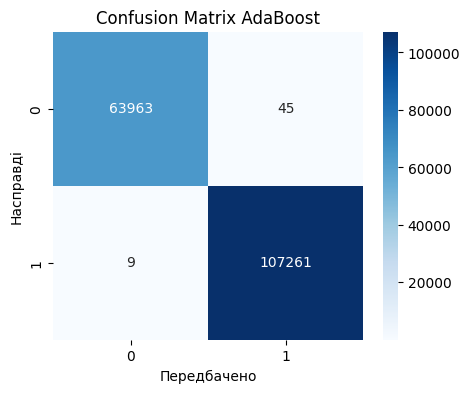

In [23]:
best_model_preds = models[best_model_name][1]
print(f'Classification report {best_model_name}:')
print(classification_report(y_test, best_model_preds))

plot_confusion_matrix(y_test, best_model_preds, best_model_name)

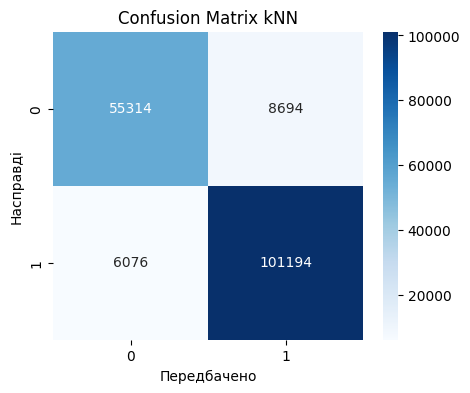

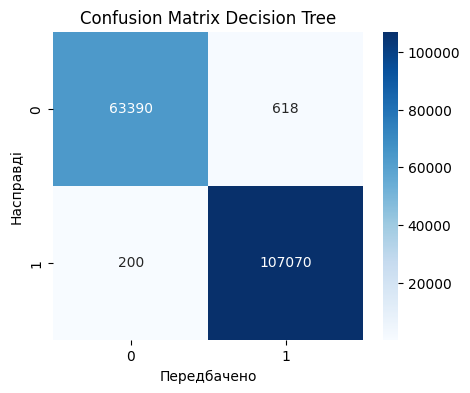

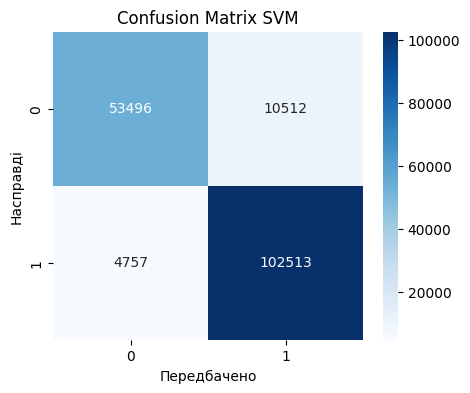

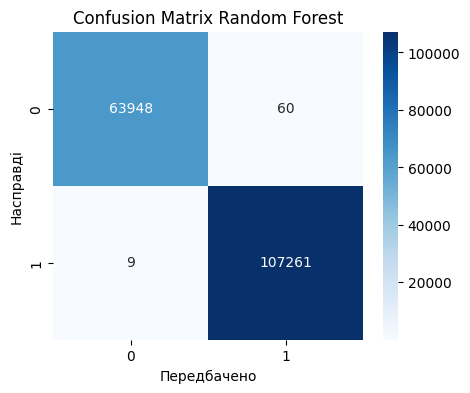

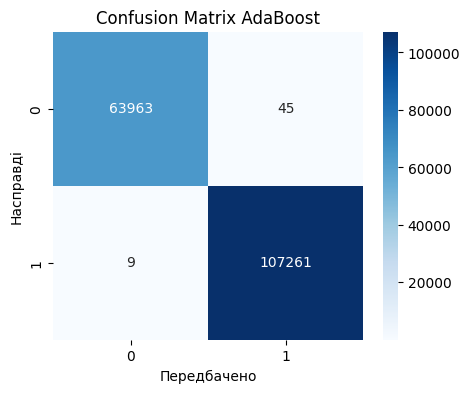

In [24]:
plot_confusion_matrix(y_test, y_pred_knn, "kNN")
plot_confusion_matrix(y_test, y_pred_tree, "Decision Tree")
plot_confusion_matrix(y_test, y_pred_svm, "SVM")
plot_confusion_matrix(y_test, y_pred_rf, "Random Forest")
plot_confusion_matrix(y_test, y_pred_ab, "AdaBoost")